# Regression & Its Evaluation — Assignment

### Question 1: What is Simple Linear Regression?
**Long Answer:**
Simple Linear Regression (SLR) is a statistical method for modeling the relationship between a single independent variable (predictor) X and a continuous dependent variable (response) Y. The model assumes a linear relationship of the form:

\[ Y = \beta_0 + \beta_1 X + \epsilon, \]

where \(\beta_0\) is the intercept, \(\beta_1\) is the slope (effect of X on Y), and \(\epsilon\) is the random error term capturing variability not explained by X. The objective is to estimate \(\beta_0\) and \(\beta_1\) from sample data, commonly via Ordinary Least Squares (OLS), which minimizes the sum of squared residuals (differences between observed and predicted Y).

**Key components and usage:**
- Interpretation: \(\beta_1\) represents the expected change in Y for a one-unit increase in X, assuming the model assumptions hold.
- Prediction: SLR can be used to predict Y for new X values, with associated prediction intervals.
- Diagnostics: After fitting, residual analysis, goodness-of-fit (R²), and assumption checks are critical.

**When to use:**
Use SLR when you have one predictor and evidence (or theory) of an approximately linear relationship with the response. If the relationship is non-linear or multiple predictors are needed, consider polynomial or multiple regression.

### Question 2: What are the key assumptions of Simple Linear Regression?
**Long Answer:**
Simple Linear Regression relies on several assumptions that, if violated, can lead to biased estimates, incorrect inference, or misleading predictions. The classical OLS assumptions (in an applied form) are:

1. **Linearity:** The expected value of Y is a linear function of X: E[Y|X] = \(\beta_0 + \beta_1 X\). If the true relationship is non-linear, linear models will be misspecified.

2. **Independence:** Observations (and their errors) are independent. Violation occurs with time series or clustered data unless modeled appropriately.

3. **Homoscedasticity (constant variance):** The variance of the errors \(Var(\epsilon|X)\) is constant across values of X. If variance changes with X (heteroscedasticity), standard errors and tests can be invalid.

4. **Normality of errors (for inference):** The errors \(\epsilon\) are normally distributed (mostly required for small-sample inference; by CLT large-sample inference is robust).

5. **No perfect multicollinearity:** In SLR this is trivial, but in multiple regression predictors should not be perfectly correlated.

6. **Exogeneity:** The predictor X is measured without error and uncorrelated with the error term (no omitted variable bias or endogeneity).

**Diagnostics & remedies:**
- Use residual vs fitted plots to check linearity and homoscedasticity.
- Apply transformations (log, Box-Cox) or weighted least squares to address heteroscedasticity.
- For dependence, use time-series models or clustered robust standard errors.
- If errors are non-normal but sample size is large, inference is often still valid due to CLT.

### Question 3: What is heteroscedasticity, and why is it important to address in regression models?
**Long Answer:**
**Heteroscedasticity** refers to the situation where the variance of the residuals (errors) is not constant across levels of the independent variable(s). In other words, \(Var(\epsilon_i | X_i)\) changes with X.

**Why it matters:**
- OLS coefficient estimates remain unbiased under heteroscedasticity (if other assumptions hold), but OLS no longer provides the Best Linear Unbiased Estimator (BLUE) in the sense of minimum variance among linear estimators.
- Most importantly, the usual OLS standard errors will be incorrect when heteroscedasticity is present, which leads to invalid hypothesis tests and confidence intervals (p-values and intervals can be misleading).

**Detection:**
- Residuals vs fitted values plot showing fan-shaped or funnel-shaped patterns.
- Formal tests like Breusch-Pagan or White's test.

**Remedies:**
- Use heteroscedasticity-consistent (robust) standard errors (e.g., White's / HC0–HC3 estimators) for valid inference.
- Transform the response (e.g., log-transform) or use weighted least squares (WLS) if a variance model is known or can be estimated.
- Consider generalized linear models or variance-stabilizing transforms when appropriate.

Addressing heteroscedasticity is important for trustworthy inference and accurate uncertainty quantification.

### Question 4: What is Multiple Linear Regression?
**Long Answer:**
Multiple Linear Regression (MLR) generalizes SLR by modeling a continuous response variable Y using multiple predictor variables X₁, X₂, …, X_p. The model has the form:

\[ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon. \]

Here, the coefficients \(\beta_j\) quantify the conditional effect of each predictor on Y, holding other predictors constant (ceteris paribus interpretation). MLR allows modeling more complex phenomena where multiple factors jointly influence the response.

**Considerations:**
- **Interpretation:** Each \(\beta_j\) is the expected change in Y for a one-unit change in X_j, keeping other X's fixed.
- **Model building:** Involves variable selection, interaction terms, polynomial terms for nonlinearity, and regularization (Ridge, Lasso) for high-dimensional settings.
- **Diagnostics:** Check multicollinearity (VIF), residual plots, influential observations (Cook's distance), and overall fit (R², adjusted R²).

**When to use:**
When multiple predictors are available and theory or data suggests they jointly influence the response. MLR provides greater explanatory power and can control for confounding variables.

### Question 5: What is polynomial regression, and how does it differ from linear regression?
**Long Answer:**
**Polynomial regression** is a special case of linear regression where the model is linear in parameters but includes polynomial terms of predictor(s) to capture nonlinear relationships. For a single predictor X, a 2nd-degree polynomial regression takes the form:

\[ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon. \]

Although the model includes X², it is still linear in coefficients (the parameters \(\beta_j\) appear linearly), so OLS can be used to estimate them. Polynomial regression allows flexible modeling of curvature while retaining a linear-in-parameters structure.

**Difference from 'linear' regression:**
- SLR assumes a straight-line relationship (Y vs X). Polynomial regression models curvature by including powers of X.
- Polynomial regression can reduce bias from model misspecification when the true relationship is nonlinear, but higher-degree polynomials can overfit and produce extreme behavior outside the data range.

**Practical notes:**
- Use polynomial regression for smooth non-linear trends but prefer simpler models or splines/GLMs when appropriate.
- Always inspect residuals and consider cross-validation to avoid overfitting.

### Question 6: Fit a Simple Linear Regression model to X = [1,2,3,4,5], Y = [2.1,4.3,6.1,7.9,10.2]. Plot regression line.

Intercept (beta0): 0.1800
Slope (beta1): 1.9800


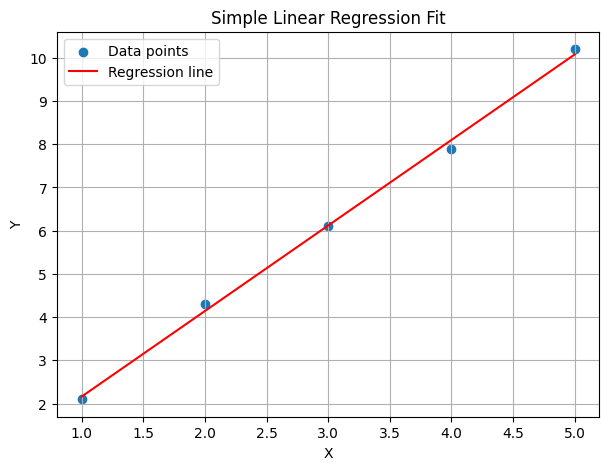

In [1]:
# Question 6: Simple Linear Regression (OLS) and plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1,4.3,6.1,7.9,10.2])

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

print(f"Intercept (beta0): {model.intercept_:.4f}")
print(f"Slope (beta1): {model.coef_[0]:.4f}")

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X, Y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X'); plt.ylabel('Y')
plt.title('Simple Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

### Question 7: Fit Multiple Linear Regression on Area, Rooms -> Price. Check multicollinearity using VIF.

In [2]:
# Question 7: Multiple Linear Regression and VIF
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]
price = [250000, 300000, 320000, 370000]

df = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Price': price})

X = df[['Area','Rooms']]
y = df['Price']

# Fit linear regression
lr = LinearRegression().fit(X, y)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# Compute VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print("\nVIF values:")
print(vif_data)

Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214

VIF values:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


### Question 8: Polynomial regression (2nd degree) for X = [1,2,3,4,5], Y = [2.2,4.8,7.5,11.2,14.7]. Plot curve.

Coefficients (beta1, beta2): [1.94 0.2 ]
Intercept: 0.0600000000000005


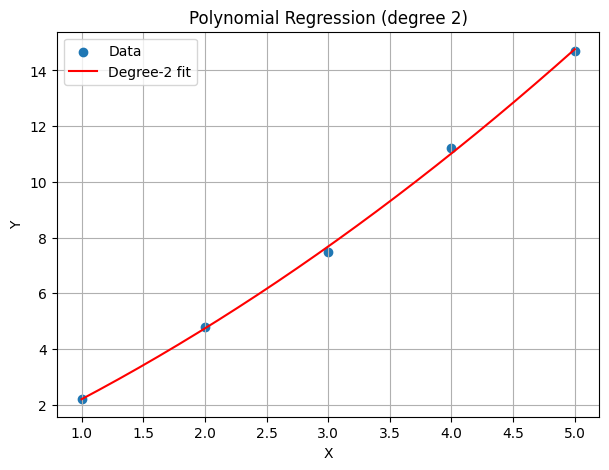

In [3]:
# Question 8: Polynomial regression (degree 2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression().fit(X_poly, Y)
print("Coefficients (beta1, beta2):", model.coef_)
print("Intercept:", model.intercept_)

# Predict on a fine grid for smooth curve
X_grid = np.linspace(1,5,200).reshape(-1,1)
X_grid_poly = poly.transform(X_grid)
y_grid = model.predict(X_grid_poly)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X, Y, label='Data')
plt.plot(X_grid, y_grid, color='red', label='Degree-2 fit')
plt.xlabel('X'); plt.ylabel('Y')
plt.title('Polynomial Regression (degree 2)')
plt.legend(); plt.grid(True)
plt.show()

### Question 9: Create a residuals plot for X = [10,20,30,40,50], Y = [15,35,40,50,65]. Assess heteroscedasticity.

Predictions: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


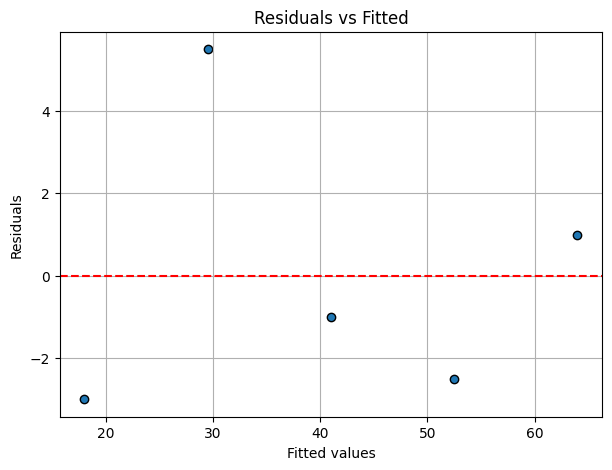


Breusch-Pagan test results:
Lagrange multiplier stat: 1.3654789844249975
p-value: 0.2425901780843885
f-value: 1.127091282653352
f p-value: 0.36628923988686196

Assessment:
 - If p-value from BP test is small (e.g., < 0.05), reject homoscedasticity -> heteroscedasticity present.
 - Visually inspect residuals: a funnel/fan-shaped pattern suggests heteroscedasticity.


In [4]:
# Question 9: Residuals plot and heteroscedasticity assessment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

lr = LinearRegression().fit(X, Y)
y_pred = lr.predict(X)
residuals = Y - y_pred

print("Predictions:", np.round(y_pred,4))
print("Residuals:", np.round(residuals,4))

# Residuals vs Fitted plot
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True)
plt.show()

# Formal Breusch-Pagan test for heteroscedasticity
X_sm = sm.add_constant(X)
bp_test = het_breuschpagan(residuals, X_sm)
labels = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test results:")
for label, val in zip(labels, bp_test):
    print(f"{label}: {val}")

print("\nAssessment:")
print(" - If p-value from BP test is small (e.g., < 0.05), reject homoscedasticity -> heteroscedasticity present.")
print(" - Visually inspect residuals: a funnel/fan-shaped pattern suggests heteroscedasticity.")